<a href="https://colab.research.google.com/github/manu675/analytics_cup_21/blob/main/AC_python_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Analytics - Analytics Cup 21

In [ ]:
# importing libaries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, roc_auc_score

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [ ]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()


Saving df.csv to df.csv


Preprocessing

In [ ]:
df = pd.read_csv('df.csv')


In [ ]:
df.head()

,Physician_ID,set,City,State,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Total_Payments,Ownership_Payments_Count,Ownership_Interest
0,1,train,FORT PIERCE,FL,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN,952.93,0,False
1,2,train,TOWSON,MD,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN,120924.92,0,False
2,3,train,TROY,NY,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN,3523.93,0,False
3,4,train,SAVANNAH,GA,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN,26745.61,0,False
4,5,train,ALBUQUERQUE,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN,25411.21,0,False


In [ ]:
df.columns

Index(['Physician_ID', 'set', 'City', 'State', 'Primary_Specialty',
       'License_State_1', 'License_State_2', 'License_State_3',
       'License_State_4', 'License_State_5', 'Total_Payments',
       'Ownership_Payments_Count', 'Ownership_Interest'],
      dtype='object')

In [ ]:
# Set ID as the index of your data and then do the split, that way you will retain the ID value for all of your train and test data

df = df.set_index('Physician_ID')

In [ ]:
df.head()

,set,City,State,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Total_Payments,Ownership_Payments_Count,Ownership_Interest
Physician_ID,,,,,,,,,,,,
1,train,FORT PIERCE,FL,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN,952.93,0,False
2,train,TOWSON,MD,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN,120924.92,0,False
3,train,TROY,NY,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN,3523.93,0,False
4,train,SAVANNAH,GA,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN,26745.61,0,False
5,train,ALBUQUERQUE,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN,25411.21,0,False


In [ ]:
df.columns

Index(['set', 'City', 'State', 'Primary_Specialty', 'License_State_1',
       'License_State_2', 'License_State_3', 'License_State_4',
       'License_State_5', 'Total_Payments', 'Ownership_Payments_Count',
       'Ownership_Interest'],
      dtype='object')

In [ ]:
# dimensionality of the df
df.shape

(6000, 12)

In [ ]:
# pairwise correlations of the columns
df.corr()

,Total_Payments,Ownership_Payments_Count,Ownership_Interest
Total_Payments,1.000000,0.189993,0.111417
Ownership_Payments_Count,0.189993,1.000000,0.473958
Ownership_Interest,0.111417,0.473958,1.000000


In [ ]:
# frequency table
df["set"].value_counts()

train    5000
test     1000
Name: set, dtype: int64

In [ ]:
# frequency table of the target variable -> imbalanced among classes
df["Ownership_Interest"].value_counts()

False    5700
True      300
Name: Ownership_Interest, dtype: int64

In [ ]:
# frequency table
df["Ownership_Payments_Count"].value_counts()

0     5700
1      141
2       33
3       19
4       14
5       10
8        5
12       5
14       5
13       5
9        4
15       4
27       4
7        3
19       3
29       3
22       3
20       3
16       3
10       3
6        2
49       2
18       2
11       2
76       1
63       1
59       1
43       1
39       1
31       1
24       1
32       1
36       1
44       1
88       1
75       1
92       1
23       1
62       1
38       1
21       1
25       1
34       1
33       1
41       1
79       1
Name: Ownership_Payments_Count, dtype: int64

In [ ]:
# labels 
y_train = df["Ownership_Interest"][df["set"] == "train"]

y_test = df["Ownership_Interest"][df["set"] == "test"]


In [ ]:
y_test.unique()

array([False])

In [ ]:
# features (manually)
X_train = df[["Total_Payments","Ownership_Payments_Count"]][df["set"] == "train"]

X_test = df[["Total_Payments","Ownership_Payments_Count"]][df["set"] == "test"]

In [ ]:
# train test split (taking 70% of the labeled training data as the training set and and 30% of the labelled training data as a validation set
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,shuffle=False)


print(X_train, X_test, y_train, y_test)

              Total_Payments  Ownership_Payments_Count
Physician_ID                                          
1                     952.93                         0
2                  120924.92                         0
3                    3523.93                         0
4                   26745.61                         0
5                   25411.21                         0
...                      ...                       ...
5995                 5528.35                         0
5996                19714.41                         0
5997                 2946.90                         0
5998                 7870.54                         0
6000                 5779.80                         0

[5000 rows x 2 columns]               Total_Payments  Ownership_Payments_Count
Physician_ID                                          
14                   5775.53                         0
18                  92123.24                         0
42                   3159.49            

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5000, 2), (1000, 2), (5000,), (1000,))

In [ ]:
X_train.head()

,Total_Payments,Ownership_Payments_Count
Physician_ID,,
1,952.93,0
2,120924.92,0
3,3523.93,0
4,26745.61,0
5,25411.21,0


In [ ]:
y_train.head()

Physician_ID
1    False
2    False
3    False
4    False
5    False
Name: Ownership_Interest, dtype: bool

In [ ]:
y_test.head()

Physician_ID
14    False
18    False
42    False
46    False
47    False
Name: Ownership_Interest, dtype: bool

XGB Boosting Classifier

In [ ]:
# initilizing the XGBClassifier as an object: (using all the default hyperparameters)
xgbc = xgb.XGBClassifier()



In [ ]:
# fitting the XGB classifier model to the training data
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

When to use which splitting strategy:

Generally, k-fold cross validation is the gold-standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.  
Use stratified cross validation to enforce class distributions when there are a large number of classes or an imbalance in instances for each class.

In [ ]:
# k-fold CV
##kfold = KFold(n_splits=5, shuffle=True) 

In [ ]:
# stratified k-fold CV (due to imbalance in the data set) -> maintains the ratio of instances in each class for each fold
skfold = StratifiedKFold(n_splits=5, shuffle=False) 
# estimator = xgbc is the xgb classifier model; "cv" determines the cross validation splitting strategy
cf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=skfold)
print("K-fold CV average score: %.2f" % cf_cv_scores.mean())


K-fold CV average score: 1.00


In [ ]:
# making predictions using the test data
y_pred_xgbc = xgbc.predict(X_test)


In [ ]:
y_pred_xgbc.shape

(1000,)

In [ ]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_xgbc, return_counts=True)


(array([False]), array([1000]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([False]), array([1000]))

Model Evaluation

In [ ]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_xgbc)

conf_matrix

array([[1000]])

In [ ]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred_xgbc)

1.0

In [ ]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_xgbc)

1.0

In [ ]:
# feature scores
xgbc.get_booster().get_fscore()

{'Ownership_Payments_Count': 72, 'Total_Payments': 24}

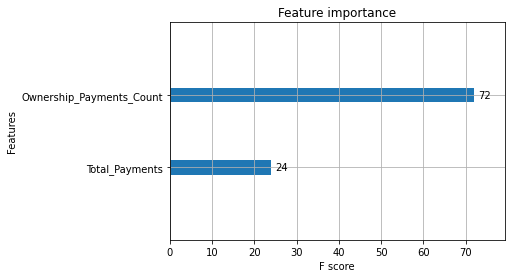

In [ ]:
# feature importance plot
xgb.plot_importance(xgbc)
plt.rcParams['figure.figsize'] = [12, 12]
plt.show()

Logistic Regression Model

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem  
  
Estimation: Maximum Likelihood

In [ ]:
# creating a logistic regression classifier object 
log_reg = LogisticRegression()

In [ ]:
# fitting the logistic regression model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predicting on the test set
y_pred_lr = log_reg.predict(X_test)

In [ ]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_lr, return_counts=True)

(array([False]), array([1000]))

Model evaluation

In [ ]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_lr)

1.0

In [ ]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)

conf_matrix

array([[1000]])

The Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity

In [ ]:
# Plotting the Receiver Operator Curve (ROC)
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: ignored

Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable

In [ ]:
# initializing a Gaussian Naive Bayes Classifier
gnb = GaussianNB()

In [ ]:
# fitting the model to the training data
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# obtaining predictions
y_pred_nb = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 0


In [ ]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_nb, return_counts=True)

(array([False,  True]), array([989,  11]))

Model Evaluation

In [ ]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_nb)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.989

In [ ]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_nb)

conf_matrix

array([[989,  11],
       [  0,   0]])

Exporting the predicitions for a submission

Export predictions into csv file  
• Format: id, prediction  
• Predictions must be 0 or 1 (not 0.5, not ‘Yes’, not ‘FALSE’)  
• Must contain all instances of the original test dataset

In [ ]:
# storing the ids and the corresponding predictions as a combined dataframe

submission = pd.DataFrame(y_pred_xgbc)

submission



,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
# storing the submission data in a csv file
##df.to_csv('submission_team_sgs.csv', index=False) 